In [137]:
# Imports
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [138]:
# importing the dataset
df = pd.read_csv (r'../CSV/FeaturesAAPL.csv', sep=',')
print(df.dtypes)

Timestamp       object
Week_Number      int64
Open           float64
High           float64
Low            float64
                ...   
% AVGPRICE     float64
% STD-5/1      float64
% STD-5/2      float64
% STD-10/1     float64
% STD-10/2     float64
Length: 90, dtype: object


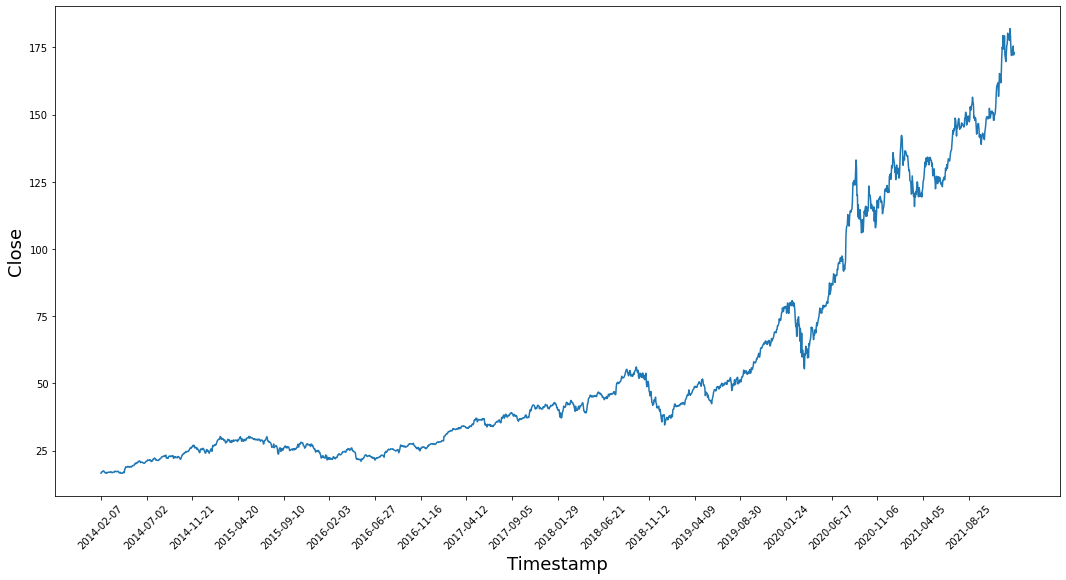

In [139]:
# preparing columns to use in model
df = df.sort_values('Timestamp')
df.reset_index()
df = df.iloc[-2000:]
df_plot = df
plt.figure(figsize = (18,9))
plt.plot(range(df_plot.shape[0]),df_plot['Close'])
plt.xticks(range(0,df_plot.shape[0],100),df_plot['Timestamp'].loc[::100],rotation=45)
plt.xlabel('Timestamp',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.show()

In [140]:
# One Scaling
data = df_plot["Close"]
closing_price = data.values
split = int(len(df) * 0.75)
print(split)
X_train = []
y_train = []

# TRAIN
sc = MinMaxScaler(feature_range=(0, 1))
scaled_data  = sc.fit_transform(closing_price.reshape(-1,1))

# Train scaling
training_data = scaled_data[0:split, :]

for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])
       
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)


# TEST
test_data = scaled_data[split-60:, :]
X_test = []
y_test = closing_price[split:,]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


1500
(1440, 60, 1)
(500, 60, 1)


In [141]:
# divided scaling
#training_set = df_plot[:3000]["Close"].values
#real_stock_price = training_set
#testing_set = df_plot[3000 - 60:]["Close"].values
#testing_set

# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
#sc = MinMaxScaler(feature_range=(0, 1))
#training_data_scaled  = sc.fit_transform(training_set.reshape(-1,1))
#testing_data_scaled  = sc.fit_transform(testing_set.reshape(-1,1))

In [142]:
#X_train = []
#y_train = []
#X_test = []
#y_test = []

#for i in range(60, 3000):
#    X_train.append(training_data_scaled[i-60:i, 0])
#    y_train.append(training_data_scaled[i, 0])
#X_train, y_train = np.array(X_train), np.array(y_train)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#for i in range(60, 1000):
#  X_test.append(testing_data_scaled[i-60:i, 0])
#  y_test.append(testing_data_scaled[i, 0])
#X_test, y_test = np.array(X_train), np.array(y_train)
#X_test = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [143]:
# Building Model:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_24 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 50)               

In [144]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
90/90 [==============================] - 3s 31ms/step - loss: 0.0014
Epoch 2/100
90/90 [==============================] - 3s 34ms/step - loss: 3.2922e-04
Epoch 3/100
90/90 [==============================] - 3s 36ms/step - loss: 2.9516e-04
Epoch 4/100
90/90 [==============================] - 3s 33ms/step - loss: 2.9118e-04
Epoch 5/100
90/90 [==============================] - 3s 32ms/step - loss: 2.5607e-04
Epoch 6/100
90/90 [==============================] - 3s 32ms/step - loss: 2.5674e-04
Epoch 7/100
90/90 [==============================] - 3s 33ms/step - loss: 2.8788e-04
Epoch 8/100
90/90 [==============================] - 3s 32ms/step - loss: 2.0914e-04
Epoch 9/100
90/90 [==============================] - 3s 33ms/step - loss: 2.0354e-04
Epoch 10/100
90/90 [==============================] - 3s 32ms/step - loss: 1.8856e-04
Epoch 11/100
90/90 [==============================] - 3s 32ms/step - loss: 1.8967e-04
Epoch 12/100
90/90 [==============================] - 3s 32ms/step 

90/90 [==============================] - 3s 31ms/step - loss: 1.0433e-04
Epoch 96/100
90/90 [==============================] - 3s 31ms/step - loss: 8.7348e-05
Epoch 97/100
90/90 [==============================] - 3s 31ms/step - loss: 1.0705e-04
Epoch 98/100
90/90 [==============================] - 3s 34ms/step - loss: 8.2361e-05
Epoch 99/100
90/90 [==============================] - 3s 32ms/step - loss: 9.6388e-05
Epoch 100/100
90/90 [==============================] - 3s 31ms/step - loss: 8.7700e-05


In [145]:
# prediction with SC inversion
predictions = model.predict(X_test)
predictions = sc.inverse_transform(predictions)
predictions=np.transpose(predictions)[0]

print(predictions)

[ 75.9825    76.14541   75.79422   75.56426   75.9106    76.54338
  76.450905  75.75143   75.40805   75.652214  76.34506   76.87898
  77.159355  77.155235  77.35284   77.61512   77.81957   77.65848
  77.49662   77.309074  76.80112   75.486145  73.45874   71.72101
  69.82183   68.07893   68.04436   68.76452   70.07453   70.90696
  70.88674   69.29123   67.94449   66.96563   65.07996   64.229
  62.86825   61.62386   60.574375  59.73832   58.431957  56.750202
  56.315037  56.89347   58.382904  59.474716  60.18291   60.548008
  60.026398  59.23216   58.4519    58.91114   60.0395    61.443256
  62.719234  63.839806  65.31407   66.646645  67.623184  68.00716
  67.69991   66.70021   65.935005  65.62223   66.02042   66.766815
  67.23095   67.756004  68.57599   69.18712   69.6389    70.14719
  70.772575  71.48735   72.43934   73.58481   74.415245  74.636925
  74.55015   74.32492   74.45816   74.78065   75.377075  75.90785
  76.31688   76.477264  76.517166  76.52856   76.52951   76.71258
  77.06

In [146]:
# RMSE calculation
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

9.58088191197364

(2000,)
            Close  Predictions
9862    78.412743    75.982498
9863    76.106995    76.145409
9864    78.260010    75.794220
9865    79.898170    75.564262
9866    79.782410    75.910599
...           ...          ...
10357  172.190002   152.423660
10358  175.080002   151.797165
10359  175.529999   151.643402
10360  172.190002   151.926331
10361  173.070007   152.177368

[500 rows x 2 columns]
(500, 2)


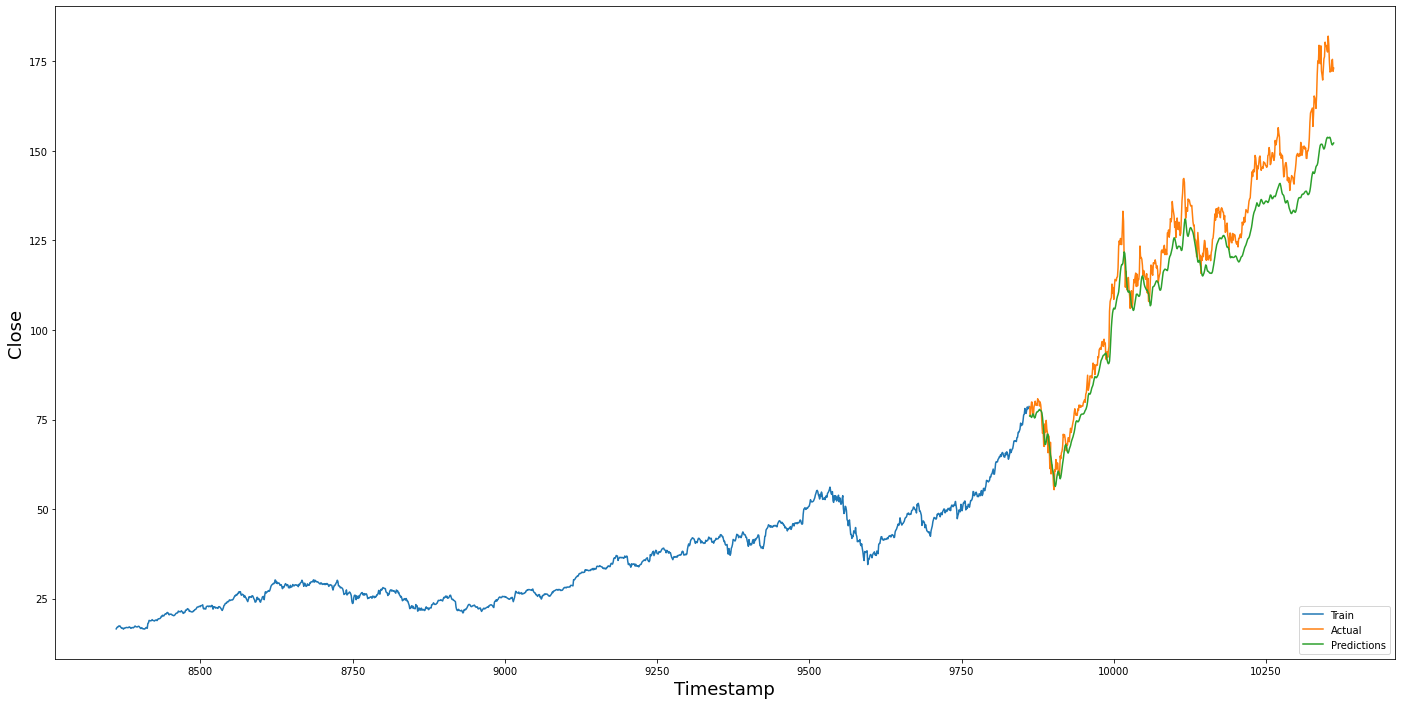

In [147]:
# recalculate for plotting
print(data.shape)
#train = data[:split]
train = pd.DataFrame(data[:split])
#alid = data[split:]
valid = pd.DataFrame(data[split:])
valid["Predictions"] = predictions

print(valid)
print(valid.shape)
cold = "Close", "Predictions"

# Plotting
plt.figure(figsize = (24,12))
plt.xlabel('Timestamp',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.plot(train)
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Actual", "Predictions"], loc = "lower right")
plt.show()

In [148]:
print(model.evaluate(X_test))

16/16 [==============================] - 0s 500us/step - loss: 0.0000e+00
0.0
